In [35]:
# importing core libraries
import pandas as pd
import numpy as np

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries for building Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
# from imblearn.combine import SMOTEENN


In [4]:
# importing dataset

data = pd.read_csv("Processed_Churn.csv")
data.head()

,Unnamed: 0,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,1,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,3,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,4,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [7]:
data = data.drop(labels="Unnamed: 0", axis= 1)

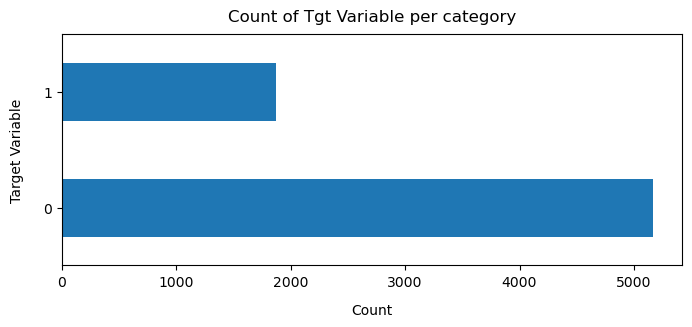

In [26]:
# let's check the imbalance before the Model Building

data["Churn"].value_counts().plot(kind= "barh", figsize= (8,3))
plt.xlabel("Count", labelpad= 10)
plt.ylabel("Target Variable", labelpad= 14)
plt.title("Count of Tgt Variable per category", y= 1.02)
plt.show()

The data is heavily imbalanced - With this kind of data most of models give poor results
- We can do upsampling or Downsampling to solve this problem
- Since larger the data better the model - We can do UpSample by creating synthetic data point using SMOTE.

In [8]:
x = data.drop("Churn", axis= 1)
y = data['Churn']

In [13]:
x.head()

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,29.85,29.85,1,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,56.95,1889.50,0,1,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,53.85,108.15,0,1,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,42.30,1840.75,0,1,1,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,70.70,151.65,1,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [15]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [17]:
# split the data into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

print('X-Train', x_train.shape, "X-test", x_test.shape, "Y-Train", y_train.shape, "Y-test", y_test.shape)

X-Train (5625, 51) X-test (1407, 51) Y-Train (5625,) Y-test (1407,)


In [19]:
h = 6 #Hyperparameter

model_dt = DecisionTreeClassifier(criterion="gini", max_depth= h, min_samples_leaf=2)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2)

In [21]:
y_pred = model_dt.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [22]:
print(classification_report(y_test, y_pred, labels= [0,1]))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1051
           1       0.60      0.57      0.58       356

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407



In [24]:
print(confusion_matrix(y_test, y_pred))

[[914 137]
 [154 202]]
